Accuracy: 0.94840


Text(50.722222222222214, 0.5, 'Actual Class')

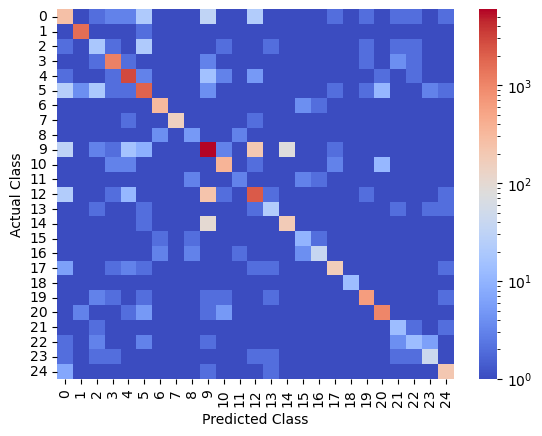

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 29 11:59:39 2024

@author: camer
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

seed = 42
test_size = 0.2
column_names = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "PktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]


df = pd.read_csv('sample2.csv', names=column_names)

target_columns = ['IoTMac']
y = df.filter(items = target_columns)
df = df.drop(['name','start_date', 'start_time', 'year_month','IoTIP', 'IoTIP_int', 'hostMac', 'IoTMac', 'hostIP', 'hostIP_int'], axis=1)

X = df

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=test_size, random_state=seed)

#Create a random forest model (we found 25 esimators was best)
model = RandomForestClassifier(n_estimators=25, random_state=seed)


model.fit(X_train, y_train)

# Make predictions and evaluate the model

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
cmatrix = confusion_matrix(y_test, y_pred)
for f in cmatrix:
    f += 1
import seaborn as sns
from matplotlib.colors import LogNorm
sns_map = sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
sns_map.set_xlabel('Predicted Class')
sns_map.set_ylabel('Actual Class')